In [5]:
import sys
import os
import torch
import numpy as np
import torchvision
import cv2
import matplotlib.pyplot as plt
import WDNet

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
basic_path = '' # local
device='cuda'
#device='cpu'

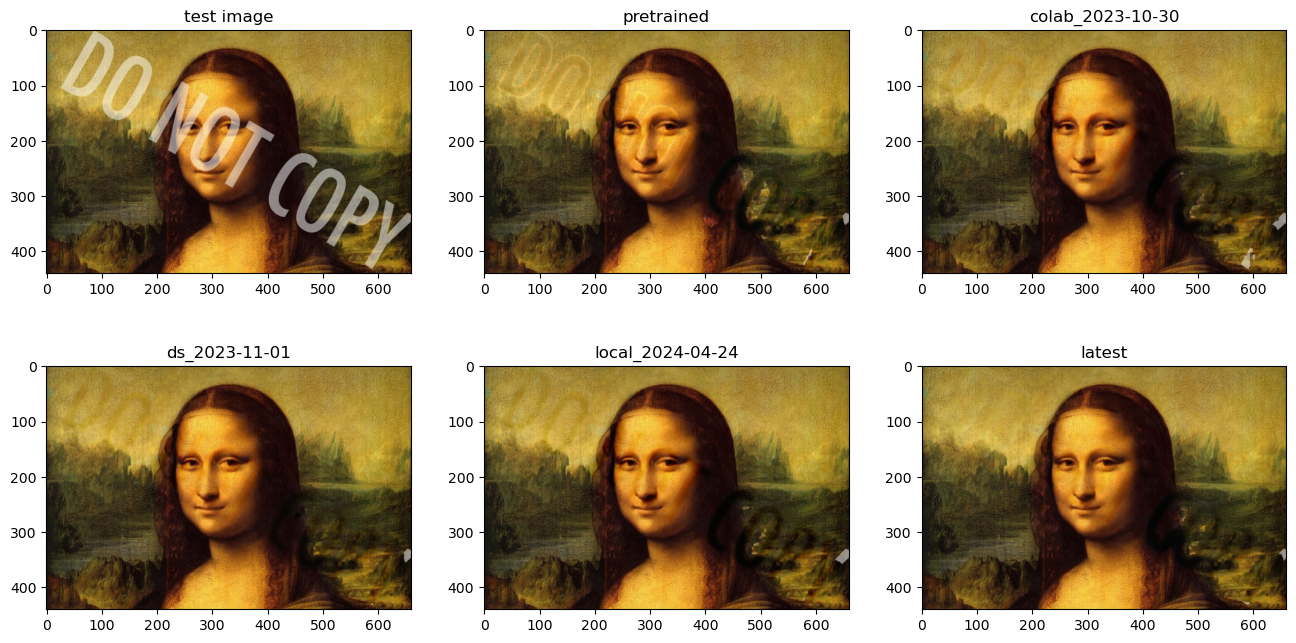

In [7]:
dirs = ['pretrained','colab_2023-10-30','ds_2023-11-01','local_2024-04-24','']

#pick-up test image
test_img_path = os.path.join('../model_WDNet','my_test_img','wm2.jpg')
#test_img_path = os.path.join('../data_CLWD/test/Watermarked_image/18.jpg')
test_img = torchvision.io.read_image(test_img_path)
test_img = test_img.float() / 255
test_img = test_img.unsqueeze(0)
test_img = test_img.to(device)

rows = 1
cols = len(dirs) + 1
if cols>3:
    rows = len(dirs) // 3 + 1
    cols = 3

plt.rcParams["figure.figsize"] = (16,8)
plt.subplot(rows, cols, 1)
plt.gca().set_title('test image')
plt.imshow(test_img.squeeze(0).cpu().permute(1,2,0))

i=2


for e in dirs:
    with torch.no_grad():  
        G_path = os.path.join('../model_WDNet',e,'WDNet_G.pkl')
        G = WDNet.generator(3,3)
        G.to(device)
        G.load_state_dict(torch.load(G_path))
        G.eval()
        restored_img = G(test_img)

    plt.subplot(rows, cols, i)
    if len(e) == 0: e='latest'
    plt.gca().set_title(e)
    plt.imshow(restored_img[0].squeeze(0).cpu().permute(1,2,0).detach().numpy())
    i+=1